In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import requests

In [55]:
airbnb_data = pd.read_csv('AB_NYC_2019.csv')
airbnb_df = pd.DataFrame(airbnb_data)
airbnb_df.head()

airbnb_df['min_price_to_stay'] = airbnb_df['price'] * airbnb_df['minimum_nights']

airbnb_df = airbnb_df[['id', 'name', 'host_id', 'host_name', 'neighbourhood_group','neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'min_price_to_stay',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']]

airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,min_price_to_stay,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,149,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,225,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,450,0,NaN,nan,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,89,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,800,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.68,-73.95,Private room,70,2,140,0,NaN,nan,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70,-73.93,Private room,40,4,160,0,NaN,nan,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81,-73.95,Entire home/apt,115,10,1150,0,NaN,nan,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.76,-73.99,Shared room,55,1,55,0,NaN,nan,6,2


In [56]:
queens_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Queens']
queens_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,min_price_to_stay,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
46,12937,"1 Stop fr. Manhattan! Private Suite,Landmark B...",50124,Orestes,Queens,Long Island City,40.75,-73.95,Private room,130,3,390,248,2019-07-01,2.25,1,215
77,18198,Little King of Queens,70091,Justin,Queens,Woodside,40.75,-73.90,Private room,70,30,2100,25,2019-05-31,0.22,1,324
143,32363,Fully Furnished Basement Apartment,140025,Fredah,Queens,Flushing,40.74,-73.83,Private room,140,2,280,1,2011-09-19,0.01,1,1
161,39593,"A room w/ a Manhattan view, longer stay",110506,Myung,Queens,Sunnyside,40.75,-73.92,Private room,79,30,2370,28,2019-04-12,0.26,1,126
181,45910,Beautiful Queens Brownstone! - 5BR,204539,Mark,Queens,Ridgewood,40.70,-73.90,Entire home/apt,350,8,2800,10,2019-05-12,0.11,5,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48858,36458668,"2beds Private Room Step to LGA, CitiFiled, Mid...",217463199,Marvy,Queens,Flushing,40.74,-73.83,Private room,68,3,204,0,NaN,nan,4,362
48863,36469741,Comfortable & Big room with 2 beds!,274012871,Stefan,Queens,Long Island City,40.77,-73.94,Private room,93,2,186,0,NaN,nan,2,14
48866,36472710,CozyHideAway Suite,274225617,Alberth,Queens,Briarwood,40.71,-73.81,Entire home/apt,58,1,58,0,NaN,nan,1,159
48878,36479723,Room for rest,41326856,Jeerathinan,Queens,Elmhurst,40.74,-73.88,Private room,45,1,45,0,NaN,nan,5,172


In [57]:
del queens_df['name'],queens_df['host_name']

queens_df.head()


,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,min_price_to_stay,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
46,12937,50124,Queens,Long Island City,40.75,-73.95,Private room,130,3,390,248,2019-07-01,2.25,1,215
77,18198,70091,Queens,Woodside,40.75,-73.90,Private room,70,30,2100,25,2019-05-31,0.22,1,324
143,32363,140025,Queens,Flushing,40.74,-73.83,Private room,140,2,280,1,2011-09-19,0.01,1,1
161,39593,110506,Queens,Sunnyside,40.75,-73.92,Private room,79,30,2370,28,2019-04-12,0.26,1,126
181,45910,204539,Queens,Ridgewood,40.70,-73.90,Entire home/apt,350,8,2800,10,2019-05-12,0.11,5,365


In [58]:
queens_df.dtypes


id                                  int64
host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
min_price_to_stay                   int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [59]:
queens_df.isnull().sum()


id                                   0
host_id                              0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
min_price_to_stay                    0
number_of_reviews                    0
last_review                       1092
reviews_per_month                 1092
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [60]:
queens_df.count()


id                                5666
host_id                           5666
neighbourhood_group               5666
neighbourhood                     5666
latitude                          5666
longitude                         5666
room_type                         5666
price                             5666
minimum_nights                    5666
min_price_to_stay                 5666
number_of_reviews                 5666
last_review                       4574
reviews_per_month                 4574
calculated_host_listings_count    5666
availability_365                  5666
dtype: int64

In [61]:
#replacing all NaN values in 'reviews_per_month' with 0
queens_df.fillna({'reviews_per_month':0}, inplace=True)
queens_df.head()


/Users/mimerahman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,min_price_to_stay,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
46,12937,50124,Queens,Long Island City,40.75,-73.95,Private room,130,3,390,248,2019-07-01,2.25,1,215
77,18198,70091,Queens,Woodside,40.75,-73.90,Private room,70,30,2100,25,2019-05-31,0.22,1,324
143,32363,140025,Queens,Flushing,40.74,-73.83,Private room,140,2,280,1,2011-09-19,0.01,1,1
161,39593,110506,Queens,Sunnyside,40.75,-73.92,Private room,79,30,2370,28,2019-04-12,0.26,1,126
181,45910,204539,Queens,Ridgewood,40.70,-73.90,Entire home/apt,350,8,2800,10,2019-05-12,0.11,5,365


In [62]:
queens_df['last_review'] = queens_df['last_review'].replace(np.nan, '9999-12-31')
queens_df.head()

<ipython-input-62-1206617eaabb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  queens_df['last_review'] = queens_df['last_review'].replace(np.nan, '9999-12-31')


,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,min_price_to_stay,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
46,12937,50124,Queens,Long Island City,40.75,-73.95,Private room,130,3,390,248,2019-07-01,2.25,1,215
77,18198,70091,Queens,Woodside,40.75,-73.90,Private room,70,30,2100,25,2019-05-31,0.22,1,324
143,32363,140025,Queens,Flushing,40.74,-73.83,Private room,140,2,280,1,2011-09-19,0.01,1,1
161,39593,110506,Queens,Sunnyside,40.75,-73.92,Private room,79,30,2370,28,2019-04-12,0.26,1,126
181,45910,204539,Queens,Ridgewood,40.70,-73.90,Entire home/apt,350,8,2800,10,2019-05-12,0.11,5,365


In [63]:
queens_df.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
min_price_to_stay                 0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [64]:
pd.options.display.float_format = "{:.2f}".format
queens_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,min_price_to_stay,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5666.00,5666.00,5666.00,5666.00,5666.00,5666.00,5666.00,5666.00,5666.00,5666.00,5666.00
mean,21754997.22,96156799.53,40.73,-73.87,99.52,5.18,893.32,27.70,1.57,4.06,144.45
std,10376865.56,84243236.25,0.04,0.06,167.10,15.03,20077.27,51.96,2.13,12.45,135.54
min,12937.00,3211.00,40.57,-73.96,10.00,1.00,10.00,0.00,0.00,1.00,0.00
25%,13960418.25,21216008.00,40.71,-73.92,50.00,1.00,80.00,1.00,0.08,1.00,2.00
50%,22564596.00,68271464.00,40.74,-73.90,75.00,2.00,160.00,7.00,0.76,1.00,98.00
75%,30768797.25,158031226.25,40.76,-73.83,110.00,3.00,375.00,32.00,2.31,3.00,286.00
max,36484363.00,274225617.00,40.80,-73.71,10000.00,500.00,1000000.00,629.00,20.94,103.00,365.00


In [65]:
queens_df.neighbourhood.unique()

array(['Long Island City', 'Woodside', 'Flushing', 'Sunnyside',
       'Ridgewood', 'Jamaica', 'Middle Village', 'Ditmars Steinway',
       'Astoria', 'Queens Village', 'Rockaway Beach', 'Forest Hills',
       'Elmhurst', 'Jackson Heights', 'St. Albans', 'Rego Park',
       'Briarwood', 'Ozone Park', 'East Elmhurst', 'Arverne',
       'Cambria Heights', 'Bayside', 'Kew Gardens', 'College Point',
       'Glendale', 'Richmond Hill', 'Bellerose', 'Maspeth', 'Woodhaven',
       'Kew Gardens Hills', 'Bay Terrace', 'Whitestone', 'Bayswater',
       'Fresh Meadows', 'Springfield Gardens', 'Howard Beach',
       'Belle Harbor', 'Jamaica Estates', 'Far Rockaway',
       'South Ozone Park', 'Corona', 'Neponsit', 'Laurelton',
       'Holliswood', 'Rosedale', 'Edgemere', 'Jamaica Hills', 'Hollis',
       'Douglaston', 'Little Neck', 'Breezy Point'], dtype=object)

In [66]:
len(queens_df.neighbourhood.unique())

51

In [67]:
price_bins = [0,49.9,99.9,149.9,249.9,499.9,10001]
bin_names = ['0-49','50-99','100-149','150-249','250-499','>500']
queens_df['price range'] = pd.cut(queens_df['price'],price_bins,labels=bin_names)
# Getting rid of 3 elements; 1. Properties with overnight accomodation prices >500
# 2. Properties with overnight stays > 30
# 3. Properties with 0 reviews
queens_df_500 = queens_df.loc[queens_df['price'] <= 500]
queens_df_500 = queens_df_500.loc[queens_df_500['minimum_nights'] <= 30]
queens_df_500 = queens_df_500.loc[queens_df_500['number_of_reviews'] > 0]

neighbourhood_by_count = queens_df_500[['neighbourhood', 'room_type', 'price range','number_of_reviews','minimum_nights','min_price_to_stay']].groupby(['neighbourhood', 'room_type', 'price range']).agg(['count', 'mean', 'min', 'max'])
neighbourhood_by_count = neighbourhood_by_count.sort_values(by=('number_of_reviews', 'count'), ascending=False)

neighbourhood_by_count.head(25)



<ipython-input-67-561b232beaaf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  queens_df['price range'] = pd.cut(queens_df['price'],price_bins,labels=bin_names)


number_of_reviews              \
                                                         count   mean  min   
neighbourhood    room_type       price range                                 
Astoria          Private room    50-99                     248  28.70 1.00   
Flushing         Private room    50-99                     176  40.88 1.00   
Long Island City Private room    50-99                     163  35.85 1.00   
Astoria          Entire home/apt 100-149                   130  27.78 1.00   
Sunnyside        Private room    50-99                     113  35.52 1.00   
Ridgewood        Private room    50-99                     104  29.83 1.00   
Ditmars Steinway Private room    50-99                      96  31.15 1.00   
Astoria          Private room    0-49                       80  26.56 1.00   
Ridgewood        Private room    0-49                       80  13.19 1.00   
Astoria          Entire home/apt 50-99                      80  34.84 1.00   
Jamaica          Private room    50-99                      76  44.93 1.00   
Flushing         Private room    0-49                       75  44.69 1.00   
Astoria          Entire home/apt 150-249                    73  20.12 1.00   
Elmhurst         Private room    50-99                      68  27.56 1.00   
Long Island City Entire home/apt 100-149                    66  20.59 1.00   
                                 150-249                    65  23.31 1.00   
Woodside         Private room    50-99                      62  32.55 1.00   
East Elmhurst    Private room    50-99                      60  94.70 1.00   
Jackson Heights  Private room    50-99                      59  35.44 1.00   
Elmhurst         Private room    0-49                       58  22.98 1.00   
East Elmhurst    Private room    0-49                       52 124.48 1.00   
Sunnyside        Entire home/apt 100-149                    45  32.00 1.00   
Woodside         Private room    0-49                       45   6.91 1.00   
Ridgewood        Entire home/apt 50-99                      42  43.24 1.00   
Forest Hills     Private room    50-99                      41  20.22 1.00   

                                                    minimum_nights             \
                                                max          count  mean  min   
neighbourhood    room_type       price range                                    
Astoria          Private room    50-99       274.00            248  2.93 1.00   
Flushing         Private room    50-99       474.00            176  1.76 1.00   
Long Island City Private room    50-99       244.00            163  3.72 1.00   
Astoria          Entire home/apt 100-149     414.00            130  5.74 1.00   
Sunnyside        Private room    50-99       258.00            113  3.52 1.00   
Ridgewood        Private room    50-99       275.00            104  2.54 1.00   
Ditmars Steinway Private room    50-99       207.00             96  2.91 1.00   
Astoria          Private room    0-49        191.00             80  7.20 1.00   
Ridgewood        Private room    0-49         77.00             80  9.12 1.00   
Astoria          Entire home/apt 50-99       441.00             80  5.34 1.00   
Jamaica          Private room    50-99       392.00             76  1.82 1.00   
Flushing         Private room    0-49        186.00             75  2.48 1.00   
Astoria          Entire home/apt 150-249     149.00             73  3.03 1.00   
Elmhurst         Private room    50-99       188.00             68  2.26 1.00   
Long Island City Entire home/apt 100-149     227.00             66  4.76 1.00   
                                 150-249     121.00             65  2.86 1.00   
Woodside         Private room    50-99       270.00             62  6.23 1.00   
East Elmhurst    Private room    50-99       466.00             60  1.28 1.00   
Jackson Heights  Private room    50-99       204.00             59  3.76 1.00   
Elmhurst         Private room    0-49        125.00             58 10.07 1.00 

In [68]:
q_nhood_by_popularity = []

for row in neighbourhood_by_count.head(25).index:
    if row[0] not in q_nhood_by_popularity:
        q_nhood_by_popularity.append(row[0])

q_nhood_listing_count = []


for n in q_nhood_by_popularity:
    count = len(queens_df_500.loc[queens_df_500['neighbourhood'] == n])
    q_nhood_listing_count.append(count)

listing_count_by_neighbourhood_df = pd.DataFrame({
    'neighbourhood': q_nhood_by_popularity,
    'count': q_nhood_listing_count
})

listing_count_by_neighbourhood_df = listing_count_by_neighbourhood_df.sort_values(by='count', ascending=False)
listing_count_by_neighbourhood_df






,neighbourhood,count
0,Astoria,695
2,Long Island City,411
1,Flushing,363
4,Ridgewood,301
3,Sunnyside,289
5,Ditmars Steinway,245
7,Elmhurst,193
6,Jamaica,192
9,East Elmhurst,170
8,Woodside,168


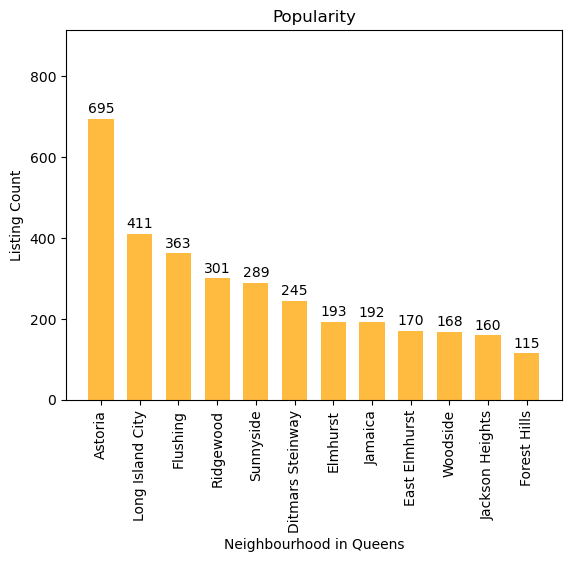

In [69]:
fig, ax = plt.subplots()

x_axis = np.arange(len(q_nhood_by_popularity))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, listing_count_by_neighbourhood_df['neighbourhood'], rotation=90)

y_axis = listing_count_by_neighbourhood_df['count']


rects1 = ax.bar(x_axis, y_axis, color="orange", alpha=0.75, align="center",  width=0.65)

ax.set_ylabel('Listing Count')
ax.set_title('Popularity')
ax.set_xlabel('Neighbourhood in Queens')
ax.set_ylim(0,max(q_nhood_listing_count)+220)


def autolabel(rects):
    # Attach a text label above each bar in *rects*, displaying its height.
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

plt.show()

In [70]:
neighbourhood_by_price = neighbourhood_by_count.head(25)

neighbourhood_by_price.loc[:, 'worth_per_stay'] = neighbourhood_by_price.loc[:, ('minimum_nights', 'mean')] * neighbourhood_by_price.loc[:, ('min_price_to_stay', 'mean')] 

neighbourhood_by_price.loc[:, 'Room Type'] = ''

for i in range(len(neighbourhood_by_price)):
    neighbourhood_by_price.iloc[i, 13] = neighbourhood_by_price.index[i][1]

    
for i in range(len(neighbourhood_by_price)):
    if neighbourhood_by_price.iloc[i, 13] == 'Private room':
        neighbourhood_by_price.iloc[i, 12] = neighbourhood_by_price.iloc[i, 5] * neighbourhood_by_price.iloc[i, 9]  * 2
        
neighbourhood_by_price = neighbourhood_by_price.sort_values(by='worth_per_stay', ascending=False)

del neighbourhood_by_price['Room Type']

neighbourhood_by_price.head()

/Users/mimerahman/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2866: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(
/Users/mimerahman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/mimerahman/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel

number_of_reviews                    \
                                                   count  mean  min    max   
neighbourhood room_type    price range                                       
Woodside      Private room 0-49                       45  6.91 1.00  53.00   
Elmhurst      Private room 0-49                       58 22.98 1.00 125.00   
Ridgewood     Private room 0-49                       80 13.19 1.00  77.00   
Woodside      Private room 50-99                      62 32.55 1.00 270.00   
Astoria       Private room 0-49                       80 26.56 1.00 191.00   

                                       minimum_nights                   \
                                                count  mean  min   max   
neighbourhood room_type    price range                                   
Woodside      Private room 0-49                    45 16.16 1.00 30.00   
Elmhurst      Private room 0-49                    58 10.07 1.00 30.00   
Ridgewood     Private room 0-49                    80  9.12 1.00 30.00   
Woodside      Private room 50-99                   62  6.23 1.00 30.00   
Astoria       Private room 0-49                    80  7.20 1.00 30.00   

                                       min_price_to_stay                       \
                                                   count   mean   min     max   
neighbourhood room_type    price range                                          
Woodside      Private room 0-49                       45 613.11 31.00 1470.00   
Elmhurst      Private room 0-49                       58 372.22 25.00 1350.00   
Ridgewood     Private room 0-49                       80 376.85 32.00 1410.00   
Woodside      Private room 50-99                      62 378.00 50.00 2100.00   
Astoria       Private room 0-49                       80 295.10 35.00 1410.00   

                                       worth_per_stay  
                                                       
neighbourhood room_type    price range                 
Woodside      Private room 0-49              19810.30  
Elmhurst      Private room 0-49               7495.82  
Ridgewood     Private room 0-49               6877.51  
Woodside      Private room 50-99              4706.71  
Astoria       Private room 0-49               4249.44

In [71]:
q_nhood_by_worth = []

for row in neighbourhood_by_count.head(25).index:
    if row[0] not in q_nhood_by_worth:
        q_nhood_by_worth.append(row[0])
        
    neighbourhood_by_price.loc[:, 'location'] = ''
for i in range(len(neighbourhood_by_price)):
    neighbourhood_by_price.iloc[i, 13] = neighbourhood_by_price.index[i][0]
    
    q_nhood_worth_per_stay = []
    
for n in q_nhood_by_worth:
    price = sum(neighbourhood_by_price.loc[neighbourhood_by_price['location'] == n, 'worth_per_stay'])
    q_nhood_worth_per_stay.append(price)
    
worth_per_stay_by_neighbourhood_df = pd.DataFrame({
    'neighbourhood': q_nhood_by_worth,
    'Worth per Stay': q_nhood_worth_per_stay
})
worth_per_stay_by_neighbourhood_df = worth_per_stay_by_neighbourhood_df.sort_values(by='Worth per Stay', ascending=False)
worth_per_stay_by_neighbourhood_df





/Users/mimerahman/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2866: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(


,neighbourhood,Worth per Stay
8,Woodside,24517.01
0,Astoria,13135.93
4,Ridgewood,10940.59
7,Elmhurst,8132.94
2,Long Island City,6146.87
3,Sunnyside,3780.85
10,Jackson Heights,1879.57
5,Ditmars Steinway,1122.42
1,Flushing,905.82
11,Forest Hills,612.36


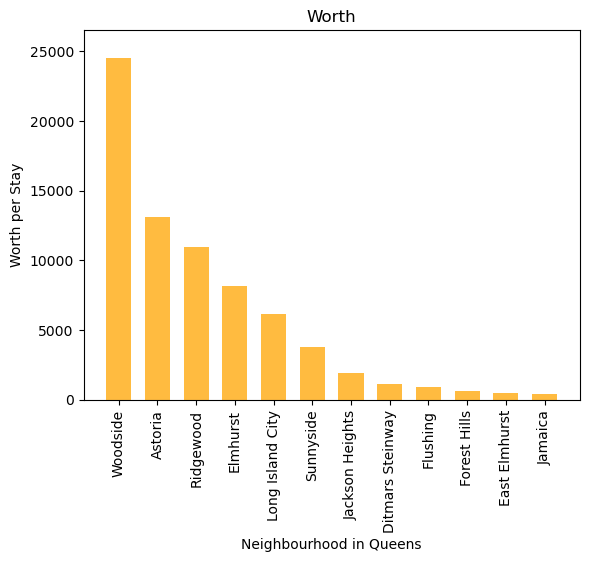

In [72]:
fig, ax = plt.subplots()

x_axis = np.arange(len(q_nhood_by_worth))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, worth_per_stay_by_neighbourhood_df['neighbourhood'], rotation=90)

y_axis = round(worth_per_stay_by_neighbourhood_df['Worth per Stay'], 2)


rects1 = ax.bar(x_axis, y_axis, color="orange", alpha=0.75, align="center",  width=0.65)

ax.set_ylabel('Worth per Stay')
ax.set_title('Worth')
ax.set_xlabel('Neighbourhood in Queens')
ax.set_ylim(0,max(q_nhood_worth_per_stay)+2000)


# def autolabel(rects):
#     # Attach a text label above each bar in *rects*, displaying its height.
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 2),  
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)

plt.show()

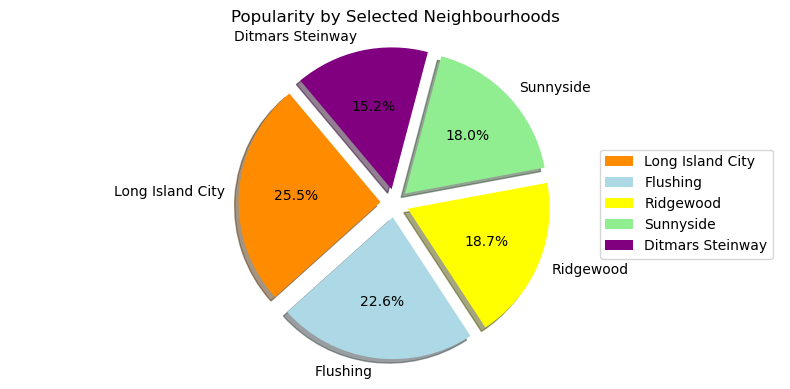

In [73]:
pie_chart_df = listing_count_by_neighbourhood_df.reset_index(drop=True)

pie_chart_df = pie_chart_df.loc[1:5, :]

fig, ax = plt.subplots(figsize=(8, 4), subplot_kw=dict(aspect="equal"))

neigh_list = pie_chart_df['neighbourhood']
length = len(pie_chart_df['neighbourhood'])

x_axis = np.arange(length)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, neigh_list, rotation=90)

y_axis = pie_chart_df['count']

explode = (0.1,0.1,0.1,0.1,0.1)
colors = ["darkorange","lightblue", "yellow", "lightgreen", "purple"]

ax.pie(y_axis, explode=explode, labels=neigh_list, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=130)

ax.set_title("Popularity by Selected Neighbourhoods")
ax.legend(loc="center right")

plt.axis("equal")

fig.tight_layout()
plt.show()

In [74]:
profitability_df = worth_per_stay_by_neighbourhood_df.reset_index(drop=True)

profitability_df = profitability_df.iloc[0:5, :]

profitability_df.loc[:, 'Profitability'] = ''

profitability_df.iloc[0, 2] = profitability_df.iloc[0, 1] * (pie_chart_df.iloc[0, 1] / sum(pie_chart_df['count'])) 

profitability_df.iloc[1, 2] = profitability_df.iloc[1, 1] * (pie_chart_df.iloc[1, 1] / sum(pie_chart_df['count'])) 

profitability_df.iloc[2, 2] = profitability_df.iloc[2, 1] * (pie_chart_df.iloc[2, 1] / sum(pie_chart_df['count'])) 

profitability_df.iloc[3, 2] = profitability_df.iloc[3, 1] * (pie_chart_df.iloc[3, 1] / sum(pie_chart_df['count'])) 

profitability_df.iloc[4, 2] = profitability_df.iloc[4, 1] * (pie_chart_df.iloc[4, 1] / sum(pie_chart_df['count'])) 

profitability_df = profitability_df.loc[:, ['neighbourhood', 'Profitability']]

profitability_df

,neighbourhood,Profitability
0,Woodside,6262.58
1,Astoria,2963.54
2,Ridgewood,2046.69
3,Elmhurst,1460.80
4,Long Island City,935.97


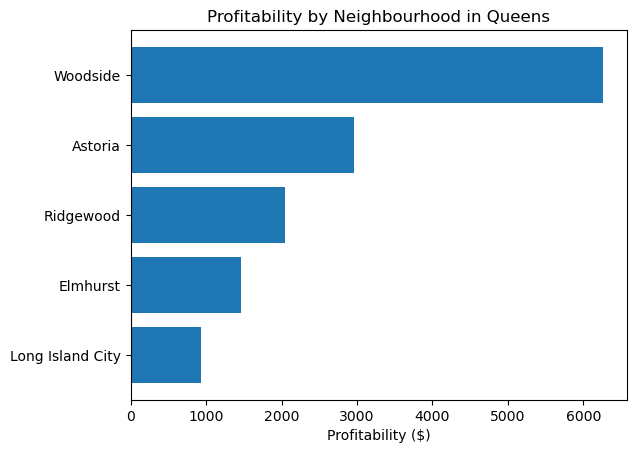

In [75]:
y_axis = profitability_df['neighbourhood'].values
x_axis = profitability_df['Profitability'].values


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data

y_pos = np.arange(len(y_axis))
error = np.random.rand(len(y_axis))
ax.barh(y_pos, x_axis, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_axis)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Profitability ($)')
ax.set_title('Profitability by Neighbourhood in Queens')

plt.show()

In [76]:
bronx_crime_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Bronx']

manhattan_crime_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Manhattan']

queens_crime_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Queens']

brooklyn_crime_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Brooklyn']

staten_island_crime_df = airbnb_df.loc[airbnb_df['neighbourhood_group'] == 'Staten Island']


In [77]:
bronx_sample_crime_df = bronx_crime_df.sample(n=100, replace=True, random_state=1)
manhattan_sample_crime_df = manhattan_crime_df.sample(n=100, replace=True, random_state=1)
queens_sample_crime_df = queens_crime_df.sample(n=100, replace=True, random_state=1)
brooklyn_sample_crime_df = brooklyn_crime_df.sample(n=100, replace=True, random_state=1)
staten_island_sample_crime_df = staten_island_crime_df.sample(n=100, replace=True, random_state=1)


bronx_sample_crime_df = bronx_sample_crime_df.reset_index(drop=True)
manhattan_sample_crime_df = manhattan_sample_crime_df.reset_index(drop=True)
queens_sample_crime_df = queens_sample_crime_df.reset_index(drop=True)
brooklyn_sample_crime_df = brooklyn_sample_crime_df.reset_index(drop=True)
staten_island_sample_crime_df = staten_island_sample_crime_df.reset_index(drop=True)

In [78]:
crime_df_sample_list = [bronx_sample_crime_df, manhattan_sample_crime_df, queens_sample_crime_df, brooklyn_sample_crime_df, staten_island_sample_crime_df]

neighbourhoods = ['Bronx', 'Manhattan', 'Queens', 'Brooklyn', 'Staten Island']
crime_numbers = []

for sample in crime_df_sample_list:
    for index, row in sample.iterrows():
        neighbourhood = row["neighbourhood"]
        neighbourhood_group = row["neighbourhood_group"]
        print(f'Looking for crime rate in index no:{index} | {neighbourhood} | {neighbourhood_group}')
        lat = row["latitude"]
        lng = row["longitude"]
        url = 'https://data.cityofnewyork.us/resource/qb7u-rbmr.json?$where=within_circle'
        query_url = url + f"(lat_lon, {lat}, {lng}, 2000)"
    
        response = requests.get(query_url)
        data = response.json()
    
        try:
            sample.loc[index,'Number of Crimes'] = len(data)

        except:
            print(f"missing value for row number {index}")
    print(f"Total Number of Crimes in {neighbourhood_group}: {sum(sample['Number of Crimes'])}")
    crime_numbers.append(sum(sample['Number of Crimes']))
    
print(f"------------------------------------------------------------------------")
print(f"Data retrieval complete.")

Looking for crime rate in index no:0 | Pelham Gardens | Bronx
Looking for crime rate in index no:1 | Longwood | Bronx
Looking for crime rate in index no:2 | Williamsbridge | Bronx
Looking for crime rate in index no:3 | Kingsbridge | Bronx
Looking for crime rate in index no:4 | Mott Haven | Bronx
Looking for crime rate in index no:5 | Throgs Neck | Bronx
Looking for crime rate in index no:6 | Norwood | Bronx
Looking for crime rate in index no:7 | Port Morris | Bronx
Looking for crime rate in index no:8 | Pelham Bay | Bronx
Looking for crime rate in index no:9 | Longwood | Bronx
Looking for crime rate in index no:10 | Allerton | Bronx
Looking for crime rate in index no:11 | Woodlawn | Bronx
Looking for crime rate in index no:12 | Morrisania | Bronx
Looking for crime rate in index no:13 | Soundview | Bronx
Looking for crime rate in index no:14 | North Riverdale | Bronx
Looking for crime rate in index no:15 | Mott Haven | Bronx
Looking for crime rate in index no:16 | Parkchester | Bronx
Lo

Looking for crime rate in index no:35 | Upper West Side | Manhattan
Looking for crime rate in index no:36 | East Harlem | Manhattan
Looking for crime rate in index no:37 | East Village | Manhattan
Looking for crime rate in index no:38 | Gramercy | Manhattan
Looking for crime rate in index no:39 | East Village | Manhattan
Looking for crime rate in index no:40 | Lower East Side | Manhattan
Looking for crime rate in index no:41 | Upper West Side | Manhattan
Looking for crime rate in index no:42 | Kips Bay | Manhattan
Looking for crime rate in index no:43 | Washington Heights | Manhattan
Looking for crime rate in index no:44 | East Harlem | Manhattan
Looking for crime rate in index no:45 | Washington Heights | Manhattan
Looking for crime rate in index no:46 | Upper West Side | Manhattan
Looking for crime rate in index no:47 | Little Italy | Manhattan
Looking for crime rate in index no:48 | West Village | Manhattan
Looking for crime rate in index no:49 | Chinatown | Manhattan
Looking for cr

Looking for crime rate in index no:65 | Rego Park | Queens
Looking for crime rate in index no:66 | Ridgewood | Queens
Looking for crime rate in index no:67 | Flushing | Queens
Looking for crime rate in index no:68 | Queens Village | Queens
Looking for crime rate in index no:69 | Kew Gardens | Queens
Looking for crime rate in index no:70 | Jackson Heights | Queens
Looking for crime rate in index no:71 | Woodside | Queens
Looking for crime rate in index no:72 | Jamaica | Queens
Looking for crime rate in index no:73 | Queens Village | Queens
Looking for crime rate in index no:74 | St. Albans | Queens
Looking for crime rate in index no:75 | East Elmhurst | Queens
Looking for crime rate in index no:76 | Woodside | Queens
Looking for crime rate in index no:77 | Rego Park | Queens
Looking for crime rate in index no:78 | Long Island City | Queens
Looking for crime rate in index no:79 | Long Island City | Queens
Looking for crime rate in index no:80 | Astoria | Queens
Looking for crime rate in 

Looking for crime rate in index no:94 | Gowanus | Brooklyn
Looking for crime rate in index no:95 | Clinton Hill | Brooklyn
Looking for crime rate in index no:96 | Williamsburg | Brooklyn
Looking for crime rate in index no:97 | Williamsburg | Brooklyn
Looking for crime rate in index no:98 | Gowanus | Brooklyn
Looking for crime rate in index no:99 | Bushwick | Brooklyn
Total Number of Crimes in Brooklyn: 2.0
Looking for crime rate in index no:0 | St. George | Staten Island
Looking for crime rate in index no:1 | Randall Manor | Staten Island
Looking for crime rate in index no:2 | Richmondtown | Staten Island
Looking for crime rate in index no:3 | Clifton | Staten Island
Looking for crime rate in index no:4 | Arrochar | Staten Island
Looking for crime rate in index no:5 | Stapleton | Staten Island
Looking for crime rate in index no:6 | South Beach | Staten Island
Looking for crime rate in index no:7 | Stapleton | Staten Island
Looking for crime rate in index no:8 | Stapleton | Staten Islan

In [80]:
crime_df = pd.DataFrame({'Neighbourhood': neighbourhoods,
                         'Total Crime Number': crime_numbers
                        })

crime_df = crime_df.sort_values(by='Total Crime Number', ascending=False)
crime_df

,Neighbourhood,Total Crime Number
1,Manhattan,342.00
0,Bronx,12.00
2,Queens,7.00
3,Brooklyn,2.00
4,Staten Island,0.00
